In [1]:
import scipy
print('scipy: %s' % scipy.__version__)

scipy: 1.4.1


In [2]:
%matplotlib inline

import os
#load the data
import s3fs
import numpy as np
import pandas as pd
from pandas import set_option
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import xgboost as xgb
from yellowbrick.classifier import ROCAUC
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

/home/jupyter-jason/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
model_df_encode = pd.read_csv('model_df_encoded')
from pandas import set_option
set_option('display.max_columns', None)
model_df_encode.head(10)

,npi,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_female_count,beneficiary_male_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,exclusion_flag,total_30_day_per_claim,drug_cost_per_claim,day_supply_per_claim,nppes_provider_gender_F,nppes_provider_gender_M,specialty_description_Allergy/Immunology,specialty_description_Cardiologist,specialty_description_Dentist,specialty_description_Dermatology,specialty_description_Emergency Medicine,specialty_description_General/Family Practice,specialty_description_Infectious Disease,specialty_description_Internal Medicine,specialty_description_Nurse,specialty_description_Obstetrics & Gynecology,specialty_description_Oncology,specialty_description_Optometry/Ophthalmology,specialty_description_Other/Undefined,specialty_description_Otolaryngology,specialty_description_Pain/Palliative Care,specialty_description_Pediatrics,specialty_description_Physical Medicine,specialty_description_Physician Assistant,specialty_description_Psychiatry/Psychology & Neurology,specialty_description_RARE,specialty_description_Respiratory/Pulmonary,specialty_description_Student,specialty_description_Surgery,specialty_description_Urology,medicare_prvdr_enroll_status_E,medicare_prvdr_enroll_status_N,medicare_prvdr_enroll_status_O,country_US,state_AL,state_AR,state_AT,state_AZ,state_CA,state_CO,state_CT,state_FL,state_GA,state_IA,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_NC,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RARE,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV,nppes_credentials_DO,nppes_credentials_Dentist/DDS,nppes_credentials_Medical Doctor,nppes_credentials_Nurse,nppes_credentials_Optometrist,nppes_credentials_Physican Assistant,nppes_credentials_RARE,nppes_credentials_unknown,female_count_not suppressed,female_count_suppressed,male_count_not suppressed,male_count_suppressed,nondual_count_not suppressed,nondual_count_suppressed,dual_count_not suppressed,dual_count_suppressed
0,1770515488,629.0,654.0,44696.90,15538.0,204.0,481.0,505.633333,32611.920,12314.0,163.0,80.0,29129.26,549.0,15567.64,0.0,0.00,198.0,13754.900,431.0,30942.00,409.0,30224.07,220.0,14472.83,54.0,588.79,459.0,34.0,8.59,5.0,0.00,0.0,5.0,0.00,22.0,287.62,16.0,0.0,0.00,0.0,71.0,122.0,82.0,89.0,115.0,1.4215,0,1.039746,71.060254,24.702703,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
1,1174060784,673.0,727.0,25846.34,19758.0,65.0,526.0,572.933333,18600.770,15504.0,51.0,96.0,19738.58,554.0,5521.89,23.0,585.87,525.0,18499.150,148.0,7347.19,523.0,23179.76,150.0,2666.58,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,11.0,73.07,5.0,5.0,0.00,5.0,69.0,38.0,27.0,19.0,46.0,1.1115,0,1.080238,38.404666,29.358098,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
2,1265525273,9103.0,10068.9,334417.10,257126.0,1481.0,7676.0,8530.900000,281752.410,218655.0,

In [4]:
from sklearn.model_selection import train_test_split

features = model_df_encode.drop(columns = ['exclusion_flag']).columns
target   = ['exclusion_flag']
X = model_df_encode[features]
y = model_df_encode[target]

#test size
test_size = 0.33

seed = 7

#Model instance
model = BaggingClassifier()

In [5]:
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

/home/jupyter-jason/.local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [6]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [7]:
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 77.56%


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


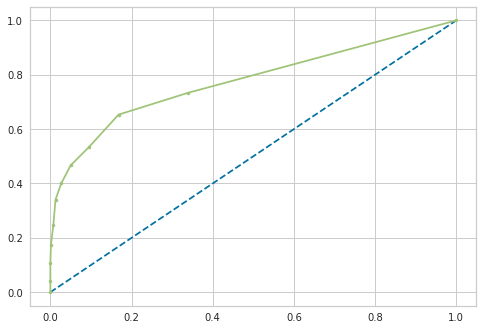

In [8]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()